<a href="https://colab.research.google.com/github/rlaqhalx/machine_learning_study/blob/main/Binary_logistic_regression_for_Titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Downloaded dataset from Kaggle

https://www.kaggle.com/heptapod/titanic

In [1]:
import os
os.environ['KAGGLE_USERNAME'] = 'username' # username
os.environ['KAGGLE_KEY'] = 'key' # key

In [2]:
!kaggle datasets download -d heptapod/titanic

  0% 0.00/10.8k [00:00<?, ?B/s]
100% 10.8k/10.8k [00:00<00:00, 19.0MB/s]


In [3]:
!unzip titanic.zip

Archive:  titanic.zip
  inflating: train_and_test2.csv     


In [4]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

##Loading Dataset

In [5]:
df = pd.read_csv('train_and_test2.csv')

df.head(5)

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


##Extracted only interested columns

In [6]:
df = pd.read_csv('train_and_test2.csv', usecols=[
  'Age',
  'Fare',
  'Sex',
  'sibsp',
  'Parch',
  'Pclass',
  'Embarked',
  '2urvived'
])

df.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked,2urvived
0,22.0,7.2500,0,1,0,3,2.0,0
1,38.0,71.2833,1,1,0,1,0.0,1
2,26.0,7.9250,1,0,0,3,2.0,1
3,35.0,53.1000,1,1,0,1,2.0,1
4,35.0,8.0500,0,0,0,3,2.0,0


## Overview of dataset

Number of survivors based on gender

<Axes: xlabel='Sex', ylabel='count'>

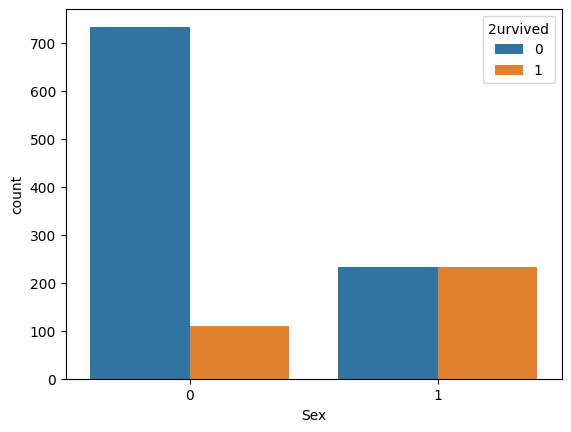

In [7]:
sns.countplot(x='Sex', hue='2urvived', data=df)

Number of survivors

<Axes: xlabel='2urvived', ylabel='count'>

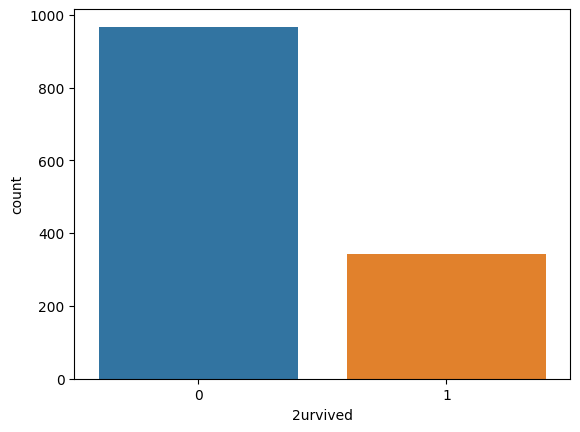

In [11]:
sns.countplot(x=df['2urvived'])
# OR sns.countplot(x='2urvived', data= df)

## Data Preprocessing

1. find null or na values
2. remove rows with null value

In [12]:
print(df.isnull().sum())

Age         0
Fare        0
Sex         0
sibsp       0
Parch       0
Pclass      0
Embarked    2
2urvived    0
dtype: int64


In [13]:
print(len(df))

df = df.dropna()

print(len(df))

1309
1307


### Divided dataset into x & y
**bold text**
I dropped 2urvived columns (x) to use the data for (y)


*astype is a method provided by pandas for converting the datatype of a pandas Series or DataFrame.
dtype is an argument provided by NumPy's array creation functions (like np.array) to specify the datatype of the resulting array.*

In [14]:
x_data = df.drop(columns=['2urvived'], axis=1)
x_data = x_data.astype(np.float32)

x_data.head(5)

,Age,Fare,Sex,sibsp,Parch,Pclass,Embarked
0,22.0,7.250000,0.0,1.0,0.0,3.0,2.0
1,38.0,71.283302,1.0,1.0,0.0,1.0,0.0
2,26.0,7.925000,1.0,0.0,0.0,3.0,2.0
3,35.0,53.099998,1.0,1.0,0.0,1.0,2.0
4,35.0,8.050000,0.0,0.0,0.0,3.0,2.0


In [15]:
y_data = df[['2urvived']]
y_data = y_data.astype(np.float32)

y_data.head(5)

,2urvived
0,0.0
1,1.0
2,1.0
3,1.0
4,0.0


### Standardization

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html

z = (x - u) / s

z = (x - average) / standard deviation

In [16]:
scaler = StandardScaler()
x_data_scaled = scaler.fit_transform(x_data)

print(x_data.values[0])
print(x_data_scaled[0])

[22.    7.25  0.    1.    0.    3.    2.  ]
[-0.58026063 -0.5018386  -0.74189967  0.48027176 -0.44540733  0.8404475
  0.6229398 ]


### Dataset Splitting
80% for Training Data, 20% for Validation Data

*No need to reshape since columns match b/w x & y

In [20]:
x_train, x_val, y_train, y_val = train_test_split(x_data_scaled, y_data, test_size=0.2, random_state=2021)

print(x_train.shape, x_val.shape)
print(y_train.shape, y_val.shape)

(1045, 7) (262, 7)
(1045, 1) (262, 1)


## Training Model

* 1 is the number of units (neurons) in this layer. Since there's only one neuron, this is a single-output layer.
* activation='sigmoid' specifies that the activation function used in this layer is the sigmoid function. The sigmoid function squashes the output between 0 and 1, which is often used in binary classification problems. (logistic regression)

* For binary logistic regression, use 'binary_crossentropy' for cost/ loss function

* metrics=['acc'] is used  when compiling a neural network model using Keras or similar deep learning frameworks.
* In this case, ['acc'] stands for accuracy. When you use metrics=['acc'], it means that during training and evaluation, the model will compute and report the classification accuracy within values 0 ~ 1
* 1 is accuracy for train data being correct 100%!

different from val_acc

-> Its accuracy for validation dataset

In [21]:
model = Sequential([
  Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=0.01), metrics=['acc'])

model.fit(
    x_train,
    y_train,
    validation_data=(x_val, y_val), # when validation data is provided, check after each epoch
    epochs=20
)

Epoch 1/20
33/33 [==============================] - 0s 5ms/step - loss: 0.7786 - acc: 0.5828 - val_loss: 0.6781 - val_acc: 0.6336
Epoch 2/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5972 - acc: 0.7024 - val_loss: 0.5410 - val_acc: 0.7519
Epoch 3/20
33/33 [==============================] - 0s 2ms/step - loss: 0.5233 - acc: 0.7684 - val_loss: 0.4867 - val_acc: 0.7634
Epoch 4/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4938 - acc: 0.7837 - val_loss: 0.4635 - val_acc: 0.7863
Epoch 5/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4813 - acc: 0.7885 - val_loss: 0.4495 - val_acc: 0.7901
Epoch 6/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4755 - acc: 0.7895 - val_loss: 0.4418 - val_acc: 0.7863
Epoch 7/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4730 - acc: 0.7914 - val_loss: 0.4379 - val_acc: 0.7863
Epoch 8/20
33/33 [==============================] - 0s 2ms/step - loss: 0.4722 - acc: 0.78

While val_acc is 0.7863, this means that when we provide new and unknown y value, the model will classify it correctly by about 78%.